# Temporal Planning with LBBD

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from os.path import (abspath, basename, dirname, isfile)

#### Configure paths

In [2]:
props_file = abspath("./results/results-eval/properties")

# Checks
if not isfile(props_file):
    raise ValueError("Incorrect property file path")

#### Process json

In [3]:
#Load Data
with open(props_file, 'r') as pf:
    raw_data = json.load(pf)

# Create DataFrame
df = pd.DataFrame(raw_data)
planners = list(set(pd.DataFrame(df.loc['id'].to_list()).loc[:,0]))

# Create a MultiIndex for df on "Planner", "Benchmarks Name","Domain", "Instance"
df.columns = pd.MultiIndex.from_tuples(df.loc['id'].to_list())
df=df.transpose()
display(df)

algorithm benchmark_name  \
cpt   IPC-2018 airport            instance-10       cpt       IPC-2018   
                                  instance-13       cpt       IPC-2018   
                                  instance-14       cpt       IPC-2018   
                                  instance-19       cpt       IPC-2018   
                                  instance-2        cpt       IPC-2018   
...                                                 ...            ...   
popf2 IPC-2018 trucks-time-strips instance-2      popf2       IPC-2018   
                                  instance-5      popf2       IPC-2018   
                                  instance-6      popf2       IPC-2018   
                                  instance-8      popf2       IPC-2018   
                                  instance-9      popf2       IPC-2018   

                                              booleans branches conflicts  \
cpt   IPC-2018 airport            instance-10      124      282         0   
                                  instance-13     2147    24159        72   
                                  instance-14     5194   152880       242   
                                  instance-19     9506   587725       973   
                                  instance-2       238      497         0   
...                                                ...      ...       ...   
popf2 IPC-2018 trucks-time-strips instance-2      None     None      None   
                                  instance-5      None     None      None   
                                  instance-6      None     None      None   
                                  instance-8      None     None      None   
                                  instance-9      None     None      None   

                                              coverage              domain  \
cpt   IPC-2018 airport            instance-10        1             airport   
                                  instance-13        1             airport   
                                  instance-14        1             airport   
                                  instance-19        1             airport   
                                  instance-2         1             airport   
...                                                ...                 ...   
popf2 IPC-2018 trucks-time-strips instance-2         0  trucks-time-strips   
                                  instance-5         0  trucks-time-strips   
                                  instance-6         0  trucks-time-strips   
                                  instance-8         0  trucks-time-strips   
                                  instance-9         0  trucks-time-strips   

                                                                                              id  \
cpt   IPC-2018 airport            instance-10              [cpt, IPC-2018, airport, instance-10]   
                                  instance-13              [cpt, IPC-2018, airport, instance-13]   
                                  instance-14              [cpt, IPC-2018, airport, instance-14]   
                                  instance-19              [cpt, IPC-2018, airport, instance-19]   
                                  instance-2                [cpt, IPC-2018, airport, instance-2]   
...                                                                                          ...   
popf2 IPC-2018 trucks-time-strips instance-2   [popf2, IPC-2018, trucks-time-strips, instance-2]   
                                  instance-5   [popf2, IPC-2018, trucks-time-strips, instance-5]   
                                  instance-6   [popf2, IPC-2018, trucks-time-strips, instance-6]   
                                  instance-8   [popf2, IPC-2018, trucks-time-strips, instance-8]   
                                  instance-9   [popf2, IPC-2018, trucks-time-strips, instance-9]   

                                              integer_propagations  \
cpt   IPC-2018 airport  

#### Info on planners, their property headers and some common operations

In [4]:
print("Columns(Properties): ", df.columns.to_list(),"\n")
print("Rows(MultiIndex - {Planner, Problem}): ", df.index.to_list()[:10],"\n")
print("Planners =", planners)

Columns(Properties):  ['algorithm', 'benchmark_name', 'booleans', 'branches', 'conflicts', 'coverage', 'domain', 'id', 'integer_propagations', 'is_plan_found', 'is_plan_optimal', 'is_plan_valid', 'makespan', 'memory', 'memory_limit', 'plan', 'plan_file', 'problem', 'propagations', 'run_dir', 'runtime_solver', 'runtime_total', 'solver_exit_code', 'time_limit', 'unexplained_errors', 'validate_exit_code'] 

Rows(MultiIndex - {Planner, Problem}):  [('cpt', 'IPC-2018', 'airport', 'instance-10'), ('cpt', 'IPC-2018', 'airport', 'instance-13'), ('cpt', 'IPC-2018', 'airport', 'instance-14'), ('cpt', 'IPC-2018', 'airport', 'instance-19'), ('cpt', 'IPC-2018', 'airport', 'instance-2'), ('cpt', 'IPC-2018', 'airport', 'instance-23'), ('cpt', 'IPC-2018', 'airport', 'instance-27'), ('cpt', 'IPC-2018', 'airport', 'instance-4'), ('cpt', 'IPC-2018', 'airport', 'instance-7'), ('cpt', 'IPC-2018', 'airport', 'instance-9')] 

Planners = ['optic', 'popf2', 'plan.py she --no-validate', 'cpt']


# Data processing and analysis

## Tables

#### Coverage

In [5]:
df.loc[:][['algorithm','coverage']].groupby(['algorithm']).sum()

,coverage
algorithm,
cpt,10
optic,11
plan.py she --no-validate,18
popf2,0


## Plots

#### Coverage over time

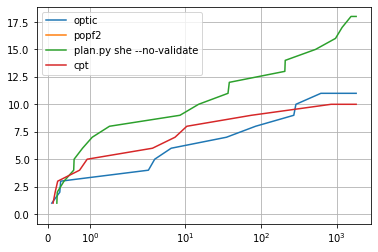

In [6]:
TIME_LIMIT = 1800.0
time_points = dict()
coverage_ov_time = dict()
for p in planners :
    time_points[p]= df.loc[p]['runtime_total'][df.loc[p]['coverage']>0].sort_values().to_list()
    coverage_ov_time[p] = list()
    step = 0
    for t in time_points[p]:
        step = step+1
        coverage_ov_time[p].append(step)
    time_points[p].append(TIME_LIMIT)
    coverage_ov_time[p].append(step)
    
for p in planners:
    plt.plot(time_points[p], coverage_ov_time[p], )
    plt.xscale('symlog')
    plt.grid(True)
plt.legend(planners)
plt.show()

####  Instance wise property comparison

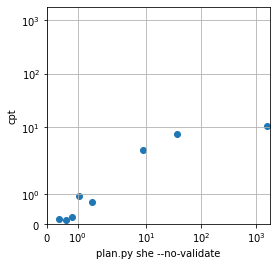

In [17]:
## Configuration
p1 = planners[2]
p2 = planners[3]
prop = 'runtime_total'

## Retrieve data

s1 = pd.to_numeric(df.loc[[p1]][prop]*df.loc[[p1]]['coverage']).to_list()
s2 = pd.to_numeric(df.loc[[p2]][prop]*df.loc[[p2]]['coverage']).to_list()

data  = {p1:s1, p2:s2}

df_plot = pd.DataFrame(data)
df_plot = df_plot[df_plot>0].dropna()

x = df_plot[p1].to_list()
y = df_plot[p2].to_list()

## Plot
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.xlabel(p1)
plt.ylabel(p2)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(0, 1800)
plt.ylim(0, 1800)
plt.grid(True)
plt.scatter(x,y)

## Search Outcomes

In [116]:
# Exit Codes

"""
Fast Downward exit codes and their meaning. They are documented at
http://www.fast-downward.org/ExitCodes.
"""

import collections
import signal

def get_exit_code(signal_value):
    return 256 - signal_value

Outcome = collections.namedtuple("Outcome", ["value", "msg", "explained", "min_wins"])

NEW_OUTCOMES = [
    Outcome(0, "success", explained=True, min_wins=False),
    Outcome(6, "out-of-memory", explained=True, min_wins=True),
    Outcome(11, "search-unsolvable", explained=True, min_wins=False),
    Outcome(12, "search-unsolvable-incomplete", explained=True, min_wins=None),
    Outcome(24, "search-out-of-time", explained=True, min_wins=True),
    Outcome(100, "out-of-memory", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGKILL), "sigkill", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGSEGV), "segfault", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGXCPU), "timeout", explained=True, min_wins=True),
]

EXITCODE_TO_OUTCOME = {outcome.value: outcome for outcome in NEW_OUTCOMES}

OUTCOMES = NEW_OUTCOMES


def get_outcome(exitcode, use_legacy_exit_codes):
    if use_legacy_exit_codes and exitcode in EXITCODE_TO_LEGACY_OUTCOME:
        return EXITCODE_TO_LEGACY_OUTCOME[exitcode]
    elif not use_legacy_exit_codes and exitcode in EXITCODE_TO_OUTCOME:
        return EXITCODE_TO_OUTCOME[exitcode]
    else:
        msg = f"exitcode-{exitcode}"
        return Outcome(exitcode, msg, explained=False, min_wins=True)
    
    
df_errcode = df[['algorithm','solver_exit_code', 'problem']].groupby(['algorithm','solver_exit_code']).count()

df_errcode.index = pd.MultiIndex.from_tuples([(x, (abs(y),get_outcome(abs(y), False).msg)) 
                                              for (x,y) in df_errcode.index.values])
display(df_errcode)

# List instances with particular set of properties
display(df[['algorithm','run_dir','solver_exit_code', 'problem']][
    (df['algorithm']=='cpt')& (df['solver_exit_code']==0) & (df['coverage']==0)])

problem
cpt                       (24, search-out-of-time)       20
                          (6, out-of-memory)             37
                          (0, success)                   21
                          (100, out-of-memory)            2
optic                     (0, success)                   11
                          (6, out-of-memory)             59
                          (24, search-out-of-time)       10
plan.py she --no-validate (0, success)                   18
                          (6, out-of-memory)             41
                          (232, timeout)                 21
popf2                     (6, out-of-memory)             56
                          (11, search-unsolvable)        10
                          (24, search-out-of-time)       14

algorithm  \
cpt IPC-2018 floortile          p442-5               cpt   
             mapanalyser        pfile3-4-2-0-1       cpt   
                                pfile3-4-2-0-3       cpt   
             trucks-time-strips instance-11          cpt   
                                instance-13          cpt   
                                instance-17          cpt   
                                instance-2           cpt   
                                instance-5           cpt   
                                instance-6           cpt   
                                instance-8           cpt   
                                instance-9           cpt   

                                                               run_dir  \
cpt IPC-2018 floortile          p442-5          runs-00001-00100/00023   
             mapanalyser        pfile3-4-2-0-1  runs-00001-00100/00031   
                                pfile3-4-2-0-3  runs-00001-00100/00032   
             trucks-time-strips instance-11     runs-00001-00100/00076   
                                instance-13     runs-00001-00100/00077   
                                instance-17     runs-00001-00100/00080   
                                instance-2      runs-00001-00100/00071   
                                instance-5      runs-00001-00100/00072   
                                instance-6      runs-00001-00100/00073   
                                instance-8      runs-00001-00100/00074   
                                instance-9      runs-00001-00100/00075   

                                               solver_exit_code problem  
cpt IPC-2018 floortile          p442-5                        0     p03  
             mapanalyser        pfile3-4-2-0-1                0     p01  
                                pfile3-4-2-0-3                0     p02  
             trucks-time-strips instance-11                   0     p11  
                                instance-13                   0     p13  
                                instance-17                   0     p17  
                                instance-2                    0     p02  
                                instance-5                    0     p05  
                                instance-6                    0     p06  
                                instance-8                    0     p08  
                                instance-9                    0     p09

#### OOM and OOT Counts

## Instance View

#### View properties

In [ ]:
#### ORTOOLS-CPT info :

# ground predicates - 
# ground operators - 
# variables in CP Model -  
# constraints in CP Model -




#### View error logs

In [54]:
signal.SIGXCPU

<Signals.SIGXCPU: 24>